In [1]:
import pandas as pd
import numpy as np

### Comparing model performance with a simple baseline
* Baseline인 Dummyregressor와 제작한 모델의 generalization을 비교하는 방법을 배운다.

* baseline은 모델이 넘어야할 가장 최소한의 기준이다.

In [2]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

### Shufflesplit
* 30개 split에 비율은 0.2라는 의미

In [3]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

regressor = DecisionTreeRegressor()
cv_results_tree_regressor = cross_validate(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error", n_jobs=2
)

errors_tree_regressor = pd.Series(
    -cv_results_tree_regressor["test_score"], name="Decision tree regressor"
)
errors_tree_regressor.describe()

count    30.000000
mean     45.787459
std       1.198573
min      43.574384
25%      44.834464
50%      46.059685
75%      46.524739
max      48.109906
Name: Decision tree regressor, dtype: float64

In [6]:
len(errors_tree_regressor)

30

### Dummy regressor
* 오로지 target data의 평균만을 계산함

In [7]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")

### 조건을 일부러 똑같이 두네
result_dummy = cross_validate(
    dummy, data, target, cv=cv, scoring="neg_mean_absolute_error", n_jobs=2
)
errors_dummy_regressor = pd.Series(
    -result_dummy["test_score"], name="Dummy regressor"
)
errors_dummy_regressor.describe()

count    30.000000
mean     91.140009
std       0.821140
min      89.757566
25%      90.543652
50%      91.034555
75%      91.979007
max      92.477244
Name: Dummy regressor, dtype: float64

In [8]:
all_errors = pd.concat(
    [errors_tree_regressor, errors_dummy_regressor],
    axis=1,
)

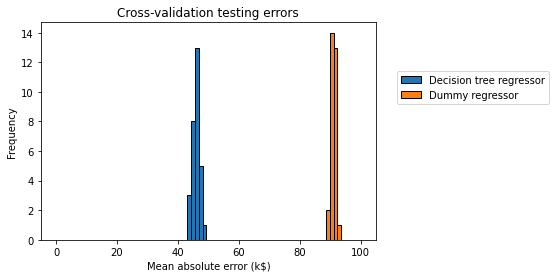

In [9]:
import matplotlib.pyplot as plt

bins = np.linspace(start=0, stop=100, num=80)
all_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Cross-validation testing errors")

### 해석
* Decision tree regressor도 $45,000의 오차가 발생했다. 하지만 dummy regressor보다는 오차가 적다.

### Exercise

In [54]:
import pandas as pd

adult_census = pd.read_csv("data/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

In [55]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 10, test_size= 0.5, random_state=0)

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
model = make_pipeline(StandardScaler(), logit )

In [57]:
cv_results = cross_validate(model, data, target, cv=cv, n_jobs= 2)

In [58]:
result_logit = pd.Series(cv_results['test_score'], name='logit')

In [59]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
cv_results_dc = cross_validate(dc,data,target,cv=cv, n_jobs =2 )


In [60]:
result_dc = pd.Series(cv_results_dc['test_score'], name='dc')
result_dc

0    0.760329
1    0.756808
2    0.759142
3    0.760739
4    0.761681
5    0.761885
6    0.757463
7    0.757176
8    0.761885
9    0.763114
Name: dc, dtype: float64

In [61]:
total_score = pd.concat([result_logit,result_dc], axis=1)

<AxesSubplot:ylabel='Frequency'>

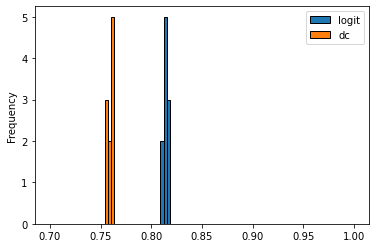

In [62]:
space = np.linspace(0.7,1, num=100)
total_score.plot.hist(bins=space, edgecolor='black')

In [63]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='stratified')
cv_results_dc = cross_validate(dc,data,target,cv=cv, n_jobs =2 )

result_str = pd.Series(cv_results_dc['test_score'], name='stra')


In [64]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='uniform')
cv_results_dc = cross_validate(dc,data,target,cv=cv, n_jobs =2 )

result_uni = pd.Series(cv_results_dc['test_score'], name='uni')


<AxesSubplot:ylabel='Frequency'>

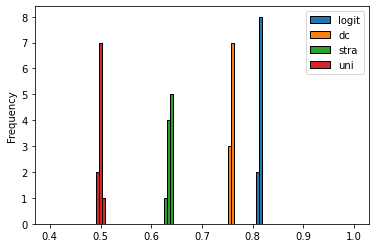

In [69]:
all_test_scores = pd.concat(
    [
        result_logit,
        result_dc,
        result_str,
        result_uni,
    ],
    axis='columns',
)

space = np.linspace(0.4,1, num=100)
all_test_scores.plot.hist(bins=space, edgecolor='black')

### Stratified
표본을 여러개의 stratum으로 나눈 뒤 개별 그룹에 대해 random sampling해서 표본을 만드는 방법

### Uniform
표본의 비율을 동일하게 뽑는 방법 ex) 모집단의 비율이 8:2라도 표본 비율을 5:5로 뽑는다.